# LAB 5-7

### Lab | Customer Analysis Round 2

For this lab, we will be using the `marketing_customer_analysis.csv` file that you can find in the `files_for_lab` folder. Check out the `files_for_lab/about.md` to get more information if you are using the Online Excel.

**Note**: For the next labs we will be using the same data file. Please save the code, so that you can re-use it later in the labs following this lab.

In [514]:
import pandas as pd
import numpy as np

## BONUS from lab1 

#### Put all the previously mentioned data transformations into a function.

In [515]:
file = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')



def lab2(f):
    f.columns = [col.lower().replace(" ", "_") for col in f.columns] #Standardize Columns

    #NVULL 

    f['state'] = f['state'].fillna('California')
    f['number_of_open_complaints'] = f['number_of_open_complaints'].fillna(0)
    f['vehicle_size'] =  f['vehicle_size'].fillna('Medsize')
    f['vehicle_class'] = f['vehicle_class'].fillna('Four-Door Car')
#     f['vehicle_type'] = f['vehicle_type'].fillna('A') 
    
#     #DATE

    f['effective_to_date'] = pd.to_datetime(f['effective_to_date'], errors ="coerce")
    f['month'] = [item.month for item in f['effective_to_date']]
    
    db_1qu = f[(f['month'] < 4)]

    return f

df = lab2(file)

df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,2


## Lab | Customer Analysis Round 3

For this lab, we still keep using the `marketing_customer_analysis.csv` file. You can find the file in the `files_for_lab` folder.

### Get the data

- Use the same jupyter file from the last lab, `Customer Analysis Round 3`

### EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:

- Show DataFrame info.
- Describe DataFrame.
- Show a plot of the total number of responses.
- Show a plot of the response rate by the sales channel.
- Show a plot of the response rate by the total claim amount.
- Show a plot of the response rate by income.


##### Show DataFrame info.

In [516]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

##### Describe DataFrame.

In [517]:
df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,1.463762
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.498712
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,1.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,1.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


##### Show a plot of the total number of responses.



In [518]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [519]:
df['response'].describe()

count     9134
unique       2
top         No
freq      7826
Name: response, dtype: object

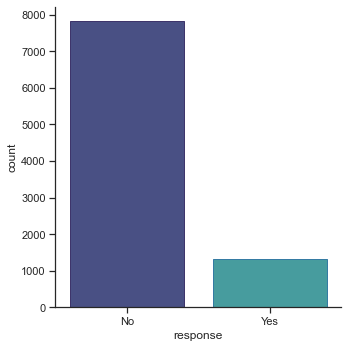

In [520]:


plot_data = pd.DataFrame(df['response'].value_counts())
plot_data = plot_data.reset_index()
plot_data.columns = ['response', 'count']

responses = (df['response'].value_counts()).to_dict()
x_values = responses.keys()
y_values = responses.values()
y_values
x_values

sns.set_theme(style="ticks")

sns.catplot(x="response", y="count", kind="bar", data = plot_data, palette="mako", edgecolor=sns.color_palette("mako", 3))


#### FUNCTIONS FOR THE FOLLOWING 3 EXERCISES

In [521]:
# x = column for which the response rate is calculated
# y = if using numerical values set amount of quartile you want to show the response rate for
# set y for 'income' and 'total amount claimed' - preferably to 4 or 10
    

def calculate_response_rate (x, y = None): #y is optional. if not given, the function will group by all unique df[x] values
    
    df2 = pd.DataFrame(df['response'])
    df1 = pd.DataFrame(df[x])
    df_conc = pd.concat([df1, df2], axis = 1)
    
     
    
    #convert 'No', 'Yes' to 0, 1 & add it to df
    
    res_calc = [1 if df_conc['response'][i] == 'Yes' 
                else 0 for i in range(len(df_conc['response']))]    
    df_conc['res_calc'] =  pd.DataFrame(res_calc)
    
    #rank the x columne to fix the qcut error: same value can not be in several bins:  
    
    df_conc['rank'] = df_conc[x].rank(method='first')
    
    #if a quartile value is given group the x variable according to the chosen number
    
    if y != None:        
                                    ## if x shall be grouped by quantiles specific labels will be shown

                #         if y == 4:
                #             df_conc['groups'] = pd.qcut(df_conc['rank'], # pd.qcut & pd.cut
                #             y, precision = 1, labels = ['0-25%', '25-50%', '50-75%', '75-100%'])

                #                     ## if x shall be grouped by quartiles of 10 specific labels will be shown

                #         elif y == 10:
                #             df_conc['groups'] = pd.qcut(df_conc['rank'], y, precision = 1,
                #             labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', 
                #                       '50-60%', '60-70%', '70-80%', '80-90%', '90-100%'])

                #                     ## if x shall be grouped by any other number of quartiles no specific lables will be shown

                #         else: 

        df_conc['groups'] = pd.qcut(df_conc['rank'], y, precision = 0)
       
        # if a grouping value is given, the total answers per group is calculated:
        
        total_answ = df_conc.groupby('groups')['groups'].count() # pd series       
        yes_sum = (df_conc.groupby('groups')['res_calc'].sum()) # count of yes answeres per group = pd series
   

    # if no grouping value is given: 
    
    else:
        
        df_conc[x] = df_conc[x].astype(str) #converting df[x] to string to avoid an error message while plotting
        total_answ = df_conc.groupby(x)[x].count() #toal answers per group is calculated = pd series  
        yes_sum = (df_conc.groupby(x)['res_calc'].sum()) #count of yes answeres per group = pd series
        
      
    #continue with general code after if, else:   
    
    yes = [yes_sum[i] for i in range(len(yes_sum))] #create list of yes counts from pd series
    
    groups = yes_sum.index.to_list() #create list of the groups
    
    total_answ = [total_answ[i] for i in range(len(total_answ))] #create list of total answeres per group
    
    
    # calculate response rate from the lists above 
    
    res_rate = list((np.array(yes)/np.array(total_answ))*100) #devide np.arrays and save as a list
    res_rate = [round(i, 2) for i in res_rate] #rounding the response rate to 2 comma 
    
    
    #create df of response rate per x value group
    
    df_r = pd.DataFrame(res_rate)  #turn responserate and groups into dfs to concat
    df_gr = pd.DataFrame(groups)        
    df_res_rate = pd.concat([df_gr, df_r], axis = 1)    
    df_res_rate.columns = ['groups', 'response_rate_%'] #set df columns
                
    display(df_res_rate)
    return df_res_rate


# Functions for sns plots: title can be set if wished. Title is optional

def plot1_horizontal (df, title=""):
        sns.barplot(x='response_rate_%', y='groups', palette="mako", data = df).set(title=title)

def plot2_bar(df, title=""):
        sns.barplot(x='groups', y='response_rate_%', data = df, palette="mako").set(title=title)



##### Show a plot of the response rate by the sales channel.

,groups,response_rate_%
0,Agent,19.15
1,Branch,11.45
2,Call Center,10.88
3,Web,11.77


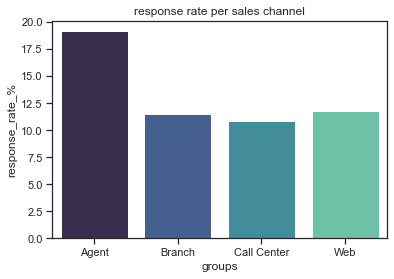

In [522]:
df1 = calculate_response_rate('sales_channel') #no grouping value needed, since it is a categorial value

plot2_bar(df1, title= "response rate per sales channel")

##### Show a plot of the response rate by the total claim amount.

,groups,response_rate_%
0,"(0.0, 914.0]",9.19
1,"(914.0, 1828.0]",9.86
2,"(1828.0, 2741.0]",9.97
3,"(2741.0, 3654.0]",18.93
4,"(3654.0, 4568.0]",15.77
5,"(4568.0, 5481.0]",15.77
6,"(5481.0, 6394.0]",19.15
7,"(6394.0, 7307.0]",19.61
8,"(7307.0, 8221.0]",13.80
9,"(8221.0, 9134.0]",11.16


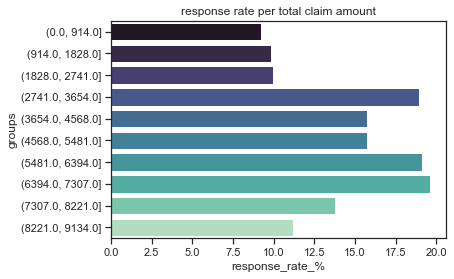

In [523]:

df2 = calculate_response_rate('total_claim_amount', 10) #grouping value makes sense in order to gain meaningful information

plot1_horizontal(df2, title = "response rate per total claim amount")


##### Show a plot of the response rate by income.

,groups,response_rate_%
0,"(0.0, 914.0]",7.88
1,"(914.0, 1828.0]",9.64
2,"(1828.0, 2741.0]",17.96
3,"(2741.0, 3654.0]",22.65
4,"(3654.0, 4568.0]",14.79
5,"(4568.0, 5481.0]",14.79
6,"(5481.0, 6394.0]",10.94
7,"(6394.0, 7307.0]",17.63
8,"(7307.0, 8221.0]",15.77
9,"(8221.0, 9134.0]",11.16


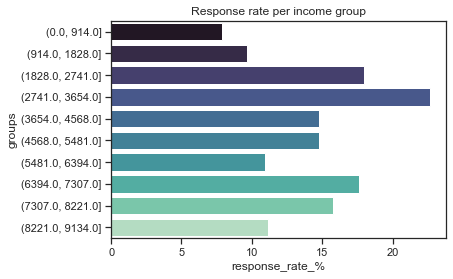

In [524]:
df_res_rate = calculate_response_rate ('income', 10) # I am using a quartile 1
df_res_rate

plot1_horizontal(df_res_rate, title="Response rate per income group")

### Testing some more

##### per eduction level 

,groups,response_rate_%
0,Bachelor,13.76
1,College,15.22
2,Doctor,17.54
3,High School or Below,13.04
4,Master,16.19


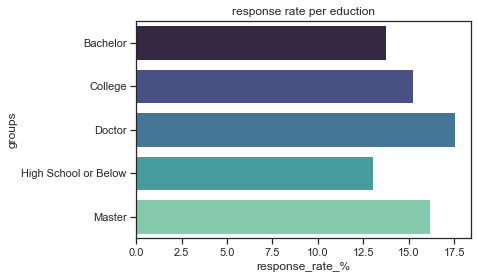

In [525]:
df_res_rate = calculate_response_rate ('education')
df_res_rate

plot1_horizontal(df_res_rate, title = "response rate per eduction")

##### per state

,groups,response_rate_%
0,Arizona,14.27
1,California,14.48
2,Nevada,14.06
3,Oregon,14.46
4,Washington,13.66


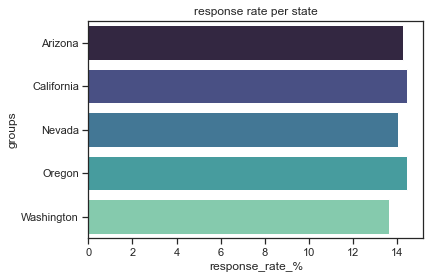

In [526]:
df_res_rate = calculate_response_rate ('state')
plot1_horizontal(df_res_rate, "response rate per state")

##### per month

,groups,response_rate_%
0,1,15.43
1,2,13.03


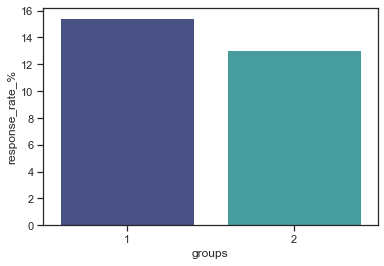

In [527]:
df_res_rate = calculate_response_rate ('month')
plot2_bar(df_res_rate)

# Lab | Customer Analysis Round 4

In today's lesson we talked about continuous distributions (mainly normal distribution), linear regression and how multicollinearity can impact the model. In this lab, we will test your knowledge on those things using the `marketing_customer_analysis.csv` file. You have been using the same data in the previous labs (round 2 and 3). You can continue using the same jupyter file. The file can be found in the `files_for_lab` folder.

### Get the data 

Use the jupyter file from the last lab (Customer Analysis Round 3)

### Complete the following task 

- Check the data types of the columns. Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
(You can use np.number and np.object to select the numerical data types and categorical data types respectively)
- Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms
  - Do the distributions for different numerical variables look like a normal distribution 
- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable. 
- Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

##### Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively

In [528]:

# To select all numeric types, use np.number or 'number'
# To select strings you must use the object dtype, but note that this will return all object dtype columns
# See the numpy dtype hierarchy   <http://docs.scipy.org/doc/numpy/reference/arrays.scalars.html>__
# To select datetimes, use np.datetime64, 'datetime' or 'datetime64'
# To select timedeltas, use np.timedelta64, 'timedelta' or 'timedelta64'
# To select Pandas categorical dtypes, use 'category'
# To select Pandas datetimetz dtypes, use 'datetimetz' (new in 0.20.0) or 'datetime64[ns, tz]'

In [529]:


dfn = df.select_dtypes(include=np.number) # dfn1 = df4.select_dtypes(include = ['number'])
dfc = df.select_dtypes(include=np.object) 
dfn['customer_lifetime_value'] = pd.to_numeric(dfn['customer_lifetime_value'])
dfn

/var/folders/dj/n16zrnc50j79vq_pt7btwyg40000gn/T/ipykernel_90797/2343410809.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dfc = df.select_dtypes(include=np.object)
/var/folders/dj/n16zrnc50j79vq_pt7btwyg40000gn/T/ipykernel_90797/2343410809.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfn['customer_lifetime_value'] = pd.to_numeric(dfn['customer_lifetime_value'])


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
0,2763.519279,56274,69,32,5,0,1,384.811147,2
1,6979.535903,0,94,13,42,0,8,1131.464935,1
2,12887.431650,48767,108,18,38,0,2,566.472247,2
3,7645.861827,0,106,18,65,0,7,529.881344,1
4,2813.692575,43836,73,12,44,0,1,138.130879,2
...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,2
9130,3096.511217,21604,79,14,28,0,1,379.200000,2
9131,8163.890428,0,85,9,37,3,2,790.784983,2
9132,7524.442436,21941,96,34,3,0,3,691.200000,2


- Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms
  - Do the distributions for different numerical variables look like a normal distribution 

In [530]:
len(df.columns)
dfn.columns



Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'month'],
      dtype='object')

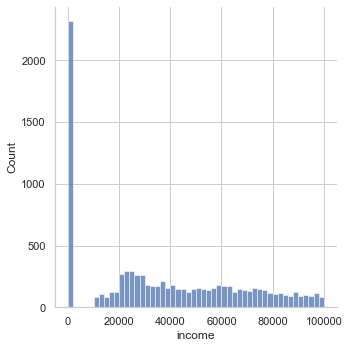

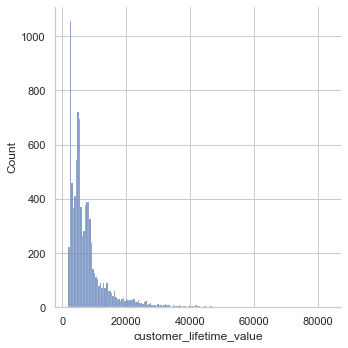

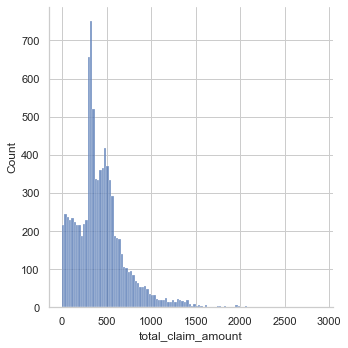

In [531]:
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
sns.set_style('whitegrid')

def distplot (col, bins = 20,):
        sns.distplot(df[col], kde = False, color ='red', bins = bins)
        return

    


ax1 = sns.displot(df['income'], bins = 50)
ax2 = sns.displot(df['customer_lifetime_value'])
ax3 = sns.displot(df['total_claim_amount'])

#dist_income = distplot('income', bins = 40)   
#dist_clv = distplot('customer_lifetime_value', bins = 100)
#dist_tcamount = distplot('total_claim_amount', bins = 100)
#dist_mslc = distplot('months_since_last_claim') --> use histogram
#dist_mpa = distplot('monthly_premium_auto') --> try histogram
#dist_openc = distplot('number_of_open_complaints' ) --> use histogram


Text(0.5, 1.0, 'total claim amount')

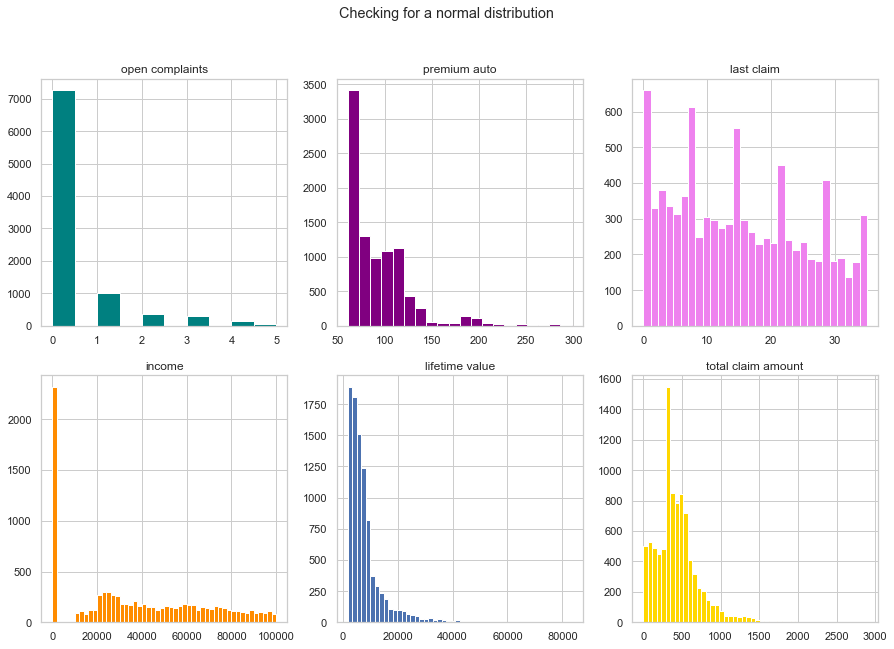

In [532]:
fig, ax = plt.subplots(2, 3, figsize=(15,10))

fig.suptitle('Checking for a normal distribution')

ax[0,0].hist(dfn['number_of_open_complaints'], color = 'teal')
ax[0,0].set_title('open complaints')
ax[0,1].hist(dfn['monthly_premium_auto'], color = 'purple', bins = 20)
ax[0,1].set_title('premium auto')
ax[0,2].hist(dfn['months_since_last_claim'], color = 'violet', bins = 30)
ax[0,2].set_title('last claim')
ax[1,0].hist(dfn['income'], color = 'darkorange', bins = 50)
ax[1,0].set_title('income')
ax[1,1].hist(dfn['customer_lifetime_value'], bins = 50)
ax[1,1].set_title('lifetime value')
ax[1,2].hist(dfn['total_claim_amount'], color = 'gold', bins = 50)
ax[1,2].set_title('total claim amount')





#plt.hist(dfn['number_of_open_complaints'])

- The column income looks the closest to a normal distribution if only people with income above 0 are considered

- Also the 'total claim amount' should be considered

##### For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

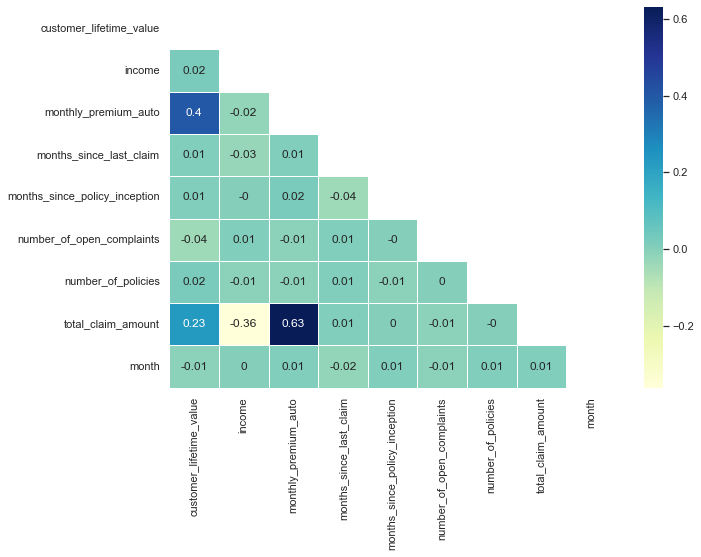

In [533]:
corr = round(dfn.corr(),2)

mask = np.zeros_like(corr) # Return an array of zeros with the same shape and type as a given array.
mask[np.triu_indices_from(mask)] = True #returns the indeces for the upper-triangle of arr

f, ax = plt.subplots(figsize= (10,7))
ax = sns.heatmap(corr, annot=True, mask = mask, linewidths=.5, cmap='YlGnBu' )




#### Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

##### -> code for correlation matrix

- no values will be droped since there is no correlation above 0.7

In [534]:
# 1) build upper triangle of matrix with boolean values


upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype('bool')) #boolean keeps orig value?

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]

dfn.drop(to_drop, axis=1)

dfn['customer_lifetime_value'] = round(dfn['customer_lifetime_value'], 2) 

/var/folders/dj/n16zrnc50j79vq_pt7btwyg40000gn/T/ipykernel_90797/2593828291.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfn['customer_lifetime_value'] = round(dfn['customer_lifetime_value'], 2)


# Lab | Customer Analysis Round 5



### Processing Data



#### X-y split.



In [536]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import skew
import numpy as np 
import pylab as p 


df_num = dfn.copy()
y = df_num['total_claim_amount']
X = df_num.drop(['total_claim_amount'], axis = 1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)


#### Normalize (numerical).

In [537]:
  
#Transforming customer_value & monthly_premium_auto

def log_transfom_clean(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return 0

# X['customer_lifetime_value'] = df_num['customer_lifetime_value'].apply(lambda x :log_transfom_clean(x))

X_train['monthly_premium_auto'] = X_train['monthly_premium_auto'].apply(lambda x :log_transfom_clean(x))
X_test['monthly_premium_auto'] = X_test['monthly_premium_auto'].apply(lambda x :log_transfom_clean(x))


#Normalization

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



/var/folders/dj/n16zrnc50j79vq_pt7btwyg40000gn/T/ipykernel_90797/698982875.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['monthly_premium_auto'] = X_train['monthly_premium_auto'].apply(lambda x :log_transfom_clean(x))
/var/folders/dj/n16zrnc50j79vq_pt7btwyg40000gn/T/ipykernel_90797/698982875.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['monthly_premium_auto'] = X_test['monthly_premium_auto'].apply(lambda x :log_transfom_clean(x))


# Lab | Customer Analysis Round 7


- One Hot/Label Encoding (categorical).
- Concat DataFrames
- Linear Regression
- Train-test split.
- Apply linear regression.
- Model Validation

Description:
- R2.
- MSE.
- RMSE.
- MAE.

### One Hot/Label Encoding (categorical) & Concat DataFrames

In [538]:
#OneHotEncoder

from sklearn.preprocessing import OneHotEncoder

df_cat = dfc.copy()
df_cus = pd.DataFrame(df_cat['customer']) #excluding column customer ID
df_ohe = df_cat.drop(['customer'], axis = 1)
intr   = df_num['total_claim_amount']

enc_list = list(df_ohe.columns)


def ohe (x):
    ohe = OneHotEncoder()    
    df = pd.DataFrame(ohe.fit_transform(df_ohe[[x]]).toarray())   
    df.columns = list(map(lambda y: y.replace('x0_', x + ': ').lower(), ohe.get_feature_names()))
    df = pd.concat([df, intr], axis = 1)
    return df                     

# concat all encoded 
df_ = pd.concat([ohe(i) for i in enc_list], axis = 1)
df_encoded = df_.drop(['total_claim_amount'], axis = 1)
df_encoded_customer = pd.concat([df_cus, df_encoded, ], axis = 1)
df_encoded_customer.head(2)


,customer,state: arizona,state: california,state: nevada,state: oregon,state: washington,response: no,response: yes,coverage: basic,coverage: extended,...,sales_channel: web,vehicle_class: four-door car,vehicle_class: luxury car,vehicle_class: luxury suv,vehicle_class: suv,vehicle_class: sports car,vehicle_class: two-door car,vehicle_size: large,vehicle_size: medsize,vehicle_size: small
0,BU79786,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,QZ44356,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Train-test split & Linear Regression Model

#### apply and validate

In [539]:
#Linear Regression with all the numerical variables as X

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

lm = LinearRegression()

lm = lm.fit(X_train_scaled,y_train)

y_pred_train = lm.predict(X_train_scaled)
y_pred_test = lm.predict(X_test_scaled)


print("R2  training :", r2_score(y_train, y_pred_train))
print("MSE training :", mean_squared_error(y_train, y_pred_train))
print("RMSE training:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("MAE training :", mean_absolute_error(y_train, y_pred_train))


print("\n<<<<<<<<<<<<<<<<<<< \n")


print("R2 testing  :", r2_score(y_test, y_pred_test))
print("MSE testing :", mean_squared_error(y_test, y_pred_test))
print("RMSE testing:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("MAE testing :", mean_absolute_error(y_test, y_pred_test))



R2  training : 0.49511990711314013
MSE training : 43571.26044977086
RMSE training: 208.73730009217533
MAE training : 149.14495314475127

<<<<<<<<<<<<<<<<<<< 

R2 testing  : 0.46667876810704845
MSE testing : 42577.17498621943
RMSE testing: 206.34237322038203
MAE testing : 150.57126550768922


## Lab | Customer Analysis Round 6

#### Try to impove the model


Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

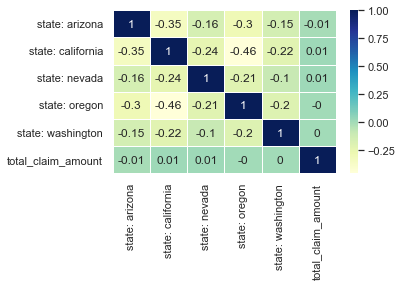

In [541]:
# Checking for possible correlation with all categorial encoded values

cross = ohe('state')
corr = round(cross.corr(),2) 

f, ax = plt.subplots(figsize= (5,3))
ax = sns.heatmap(corr, annot=True, linewidths=.5, cmap='YlGnBu' )

df_ohe.columns

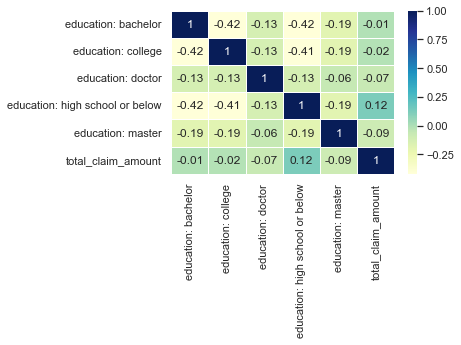

In [542]:
cross = ohe('education')
corr = round(cross.corr(),2) 

f, ax = plt.subplots(figsize= (5,3))
ax = sns.heatmap(corr, annot=True, linewidths=.5, cmap='YlGnBu')



# --> onyl one correlation reaches 0.5, therefore I do not include any variable

/Users/steib/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


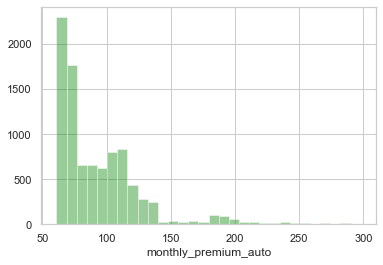

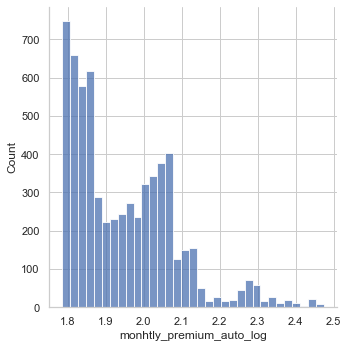

In [550]:
# Based on privious numerical correlation heatmap i will consider using only -
## - 'monthly_premium_auto' as an independent variabel 


sns.distplot(df_num['monthly_premium_auto'], kde = False, color ='green', bins = 30)

X = df_num['monthly_premium_auto']
y = df_num['total_claim_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#Transform Monthly Premium Auto with LogTransform

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)


def log_transfom_clean(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return 0

X_train['monhtly_premium_auto_log'] = X_train['monthly_premium_auto'].apply(lambda x :log_transfom_clean(x))
X_test['monhtly_premium_auto_log'] = X_test['monthly_premium_auto'].apply(lambda x :log_transfom_clean(x))

X_train = X_train.drop(['monthly_premium_auto'], axis = 1)
X_test = X_test.drop(['monthly_premium_auto'], axis = 1)


sns.displot(X_train['monhtly_premium_auto_log'])


#Normalization

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)





In [1]:
lm_lab6 = LinearRegression()
lm_lab6.fit(X_train_scaled, y_train)

y_pred_train = lm_lab6.predict(X_train_scaled)
y_pred_test  = lm_lab6.predict(X_test_scaled)

print("R2  training :", r2_score(y_train, y_pred_train))
print("MSE training :", mean_squared_error(y_train, y_pred_train))
print("RMSE training:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("MAE training :", mean_absolute_error(y_train, y_pred_train))


print("\n<<<<<<<<<<<<<<<<<<< \n")


print("R2 testing  :", r2_score(y_test, y_pred_test))
print("MSE testing :", mean_squared_error(y_test, y_pred_test))
print("RMSE testing:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("MAE testing :", mean_absolute_error(y_test, y_pred_test))

NameError: name 'LinearRegression' is not defined

### --> model did not improve. Using more of the numercial values predicts more accuratly